In [1]:
import tensorflow as tf
import pandas as pd
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification

In [2]:

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast



In [3]:
import os
import sys
sys.path.append(os.path.join(os.environ['USERPROFILE'], '.local', 'lib', 'python3.7', 'site-packages'))


In [4]:
data = pd.read_csv("../../Desktop/notebooks/mult_ds_preprocessed.csv")

In [104]:
data_cleaned = data.dropna()

In [105]:
data_cleaned["toxic"] = data_cleaned["toxic"].astype(int)

C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_22200\715723981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned["toxic"] = data_cleaned["toxic"].astype(int)


In [106]:
data_cleaned.shape

(42881, 9)

In [107]:
data_cleaned.head()

,Unnamed: 0,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,426417035bd5b20c,пропонований злиття неформалізм стаття існуват...,0,0.0,0.0,0.0,0.0,0.0
1,1,4264fd1c363935d3,колір фон заповнення колір фон світлосірий вер...,0,0.0,0.0,0.0,0.0,0.0
2,2,4265fd7c2447bc08,жила скеля половина австралійський англійський...,0,0.0,0.0,0.0,0.0,0.0
3,3,4266b67c57e3cfbb,японський назва місто переглянути пост вікіпед...,0,0.0,0.0,0.0,0.0,0.0
4,4,426a0fd1b3460373,небажання обговорювати будьякий змінити свідчи...,1,0.0,0.0,0.0,0.0,0.0


In [27]:
# Select only the "comment_text" and "toxic" columns
selected_columns = ['comment_text', 'toxic']
data = data_cleaned[selected_columns]


In [109]:
data_cleaned.shape

(42881, 9)

In [11]:
from transformers import TFAutoModel, BertTokenizerFast
from transformers import TFRobertaModel
from transformers import TFBertModel


# import BERT-base pretrained model
bert = TFBertModel.from_pretrained('bert-base-multilingual-cased')
# Load the BERT tokenizer
tokenizer = BertTokenizerFast.from_pretrained('bert-base-multilingual-cased')

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [29]:
data["toxic"] = data["toxic"].astype(int)

C:\Users\DVdovenko\AppData\Local\Temp\ipykernel_22200\4071066043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["toxic"] = data["toxic"].astype(int)


In [30]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets while stratifying the target variable
train_data, test_data, train_labels, test_labels = train_test_split(data['comment_text'], data['toxic'], 
                                                                    test_size=0.1, random_state=42, shuffle = True, 
                                                                    stratify=data['toxic'])

# Split the training data into training and validation sets while stratifying the target variable
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, 
                                                                  test_size=0.2, random_state=42, shuffle = True, 
                                                                  stratify=train_labels)

In [31]:
train_labels

14662    0
7882     0
19671    0
16366    0
748      0
        ..
10347    0
11085    0
5454     0
10007    0
19188    0
Name: toxic, Length: 15305, dtype: int32

In [32]:
train_data = [str(example) for example in train_data]
val_data = [str(example) for example in val_data]
test_data = [str(example) for example in test_data]


In [33]:
max_len = 256

In [34]:
X_train = tokenizer(
    text=train_data,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

X_test = tokenizer(
    text=test_data,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

X_val = tokenizer(
    text=val_data,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [35]:
X_train

{'input_ids': <tf.Tensor: shape=(15305, 256), dtype=int32, numpy=
array([[   101,  13248,  16417, ...,      0,      0,      0],
       [   101, 104289,  35415, ...,      0,      0,      0],
       [   101,  37213,  18481, ...,      0,      0,      0],
       ...,
       [   101,    558,  83322, ...,      0,      0,      0],
       [   101,  10956,  29483, ...,      0,      0,      0],
       [   101,  30977,  23479, ...,  28940,  77431,    102]])>, 'attention_mask': <tf.Tensor: shape=(15305, 256), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])>}

In [17]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)

y = Dense(1, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    #decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':X_train['input_ids'], 'attention_mask':X_train['attention_mask']},
    y = train_labels,
    validation_data = ({'input_ids':X_val['input_ids'], 'attention_mask':X_val['attention_mask']},
                        val_labels),
    epochs=1,
    batch_size=32, verbose = 1 
)

C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


858/858 [==============================] - 20470s 24s/step - loss: 0.0000e+00 - balanced_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_balanced_accuracy: 1.0000


<Figure size 800x500 with 0 Axes>

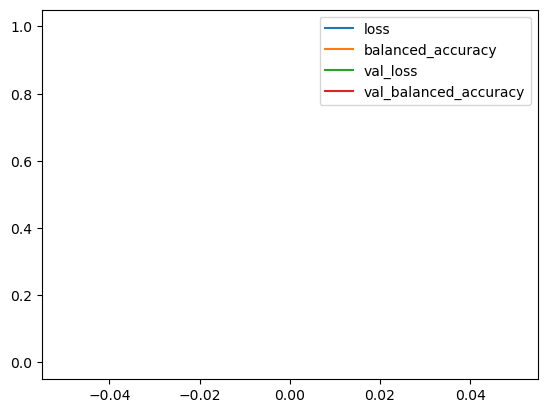

In [18]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [19]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(test_labels, y_predicted))

269/269 [==============================] - 1822s 7s/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7741
           1       0.00      0.00      0.00       836

    accuracy                           0.90      8577
   macro avg       0.45      0.50      0.47      8577
weighted avg       0.81      0.90      0.86      8577



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
import tensorflow as tf
from tensorflow import keras
from keras.metrics import Recall, Precision
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(1, activation='sigmoid')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    clipnorm=1.0
)


model.compile(
    loss='BinaryCrossentropy', optimizer = 'Adam', metrics = ['accuracy', keras.metrics.Precision(), keras.metrics.Recall()]
)



In [39]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  177853440   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 256,                                         

In [40]:
history = model.fit(
    x = {'input_ids':X_train['input_ids'], 'attention_mask':X_train['attention_mask']},
    y = train_labels,
    validation_data = ({'input_ids':X_val['input_ids'], 'attention_mask':X_val['attention_mask']},
                        val_labels),
    epochs=1,
    batch_size=32, verbose = 1 
)

 58/479 [==>...........................] - ETA: 4:41:02 - loss: 0.3386 - accuracy: 0.8955 - precision_2: 0.0345 - recall_2: 0.0060

KeyboardInterrupt: 

<Figure size 800x500 with 0 Axes>

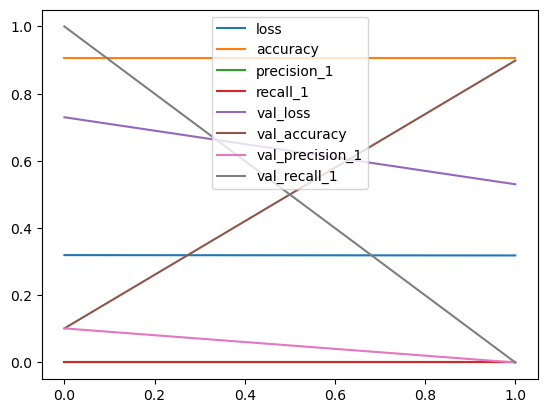

In [32]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [34]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(test_labels, y_predicted))

269/269 [==============================] - 1882s 7s/step
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      7741
           1       0.00      0.00      0.00       836

    accuracy                           0.90      8577
   macro avg       0.45      0.50      0.47      8577
weighted avg       0.81      0.90      0.86      8577



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


###Function for Encoding the comment###
def regular_encode(texts, tokenizer, maxlen=512):

    encode_dictionary = tokenizer.batch_encode_plus(texts, return_attention_mask=False, return_token_type_ids=False,
    pad_to_max_length=True,max_length=maxlen)
    
    return np.array(encode_dictionary['input_ids'])

### Function for Neural Network Model###
def build_model(transformer, max_len=512):

    input_word_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    sequence_output = transformer(input_word_ids)[0]
    cls_token = sequence_output[:, 0, :]
    out = Dense(1, activation='sigmoid')(cls_token)
    model = Model(inputs=input_word_ids, outputs=out)
    model.compile(Adam(lr=1e-5), loss='binary_crossentropy', metrics=[tf.keras.metrics.AUC()])
    
    return model
  
 #API to build highly flexible and efficient TensorFlow input pipelines.
AUTO = tf.data.experimental.AUTOTUNE
strategy = tf.distribute.MirroredStrategy()
EPOCHS = 3 #number of epochs in model
BATCH_SIZE = 16 * strategy.num_replicas_in_sync # the batch size in each epoch (128)
MAX_LEN = 192
MODEL='bert-base-multilingual-cased'

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)


In [134]:
from sklearn.model_selection import train_test_split

# assuming your data is stored in a pandas DataFrame called df
X_train_val, X_test, y_train_val, y_test = train_test_split(data_cleaned["comment_text"], data_cleaned.drop(columns=["comment_text"]), test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)


In [136]:
y_train.toxic.values

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

In [137]:
y_val.toxic.values

array([1, 0, 0, ..., 1, 0, 0])

In [115]:
X_train = X_train.tolist()
X_val = X_val.tolist()
X_test = X_test.tolist()

In [116]:
train_data = [str(example) for example in X_train]
val_data = [str(example) for example in X_val]
test_data = [str(example) for example in X_test]

In [138]:
### tokenaizer ###
import time
tokenizer = AutoTokenizer.from_pretrained(MODEL)

### Encode The Comments ###

#x_train,x_test, and x_validation will have the comment text column only,(in test called "content")
x_train = regular_encode(train_data, tokenizer, maxlen=MAX_LEN)
x_valid = regular_encode(val_data, tokenizer, maxlen=MAX_LEN)
x_test = regular_encode(test_data, tokenizer, maxlen=MAX_LEN)

#y_train,y_valid will have te target column "toxic"
y_train = y_train.toxic.values
y_test = y_test.toxic.values
y_valid = y_val.toxic.values

### Prepare Tensorflow Dataset For Modeling ###

train_dataset = (tf.data.Dataset .from_tensor_slices((x_train, y_train)).repeat()
                 .shuffle(2048,seed=40).batch(BATCH_SIZE).prefetch(AUTO)) 


valid_dataset = (tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).batch(BATCH_SIZE)
                 .cache().prefetch(AUTO))

test_dataset = (tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)
                 .cache().prefetch(AUTO))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\transformers\tokenization_utils_base.py:2339: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [139]:
transformer_layer = TFAutoModel.from_pretrained(MODEL)
model = build_model(transformer_layer, max_len=MAX_LEN)
model.summary()

#train the model
n_steps = x_train.shape[0] // BATCH_SIZE
train_history = model.fit(train_dataset, steps_per_epoch=n_steps, validation_data=valid_dataset,epochs=EPOCHS)


#the model on validation
n_steps = x_valid.shape[0] // BATCH_SIZE
train_history_2 = model.fit(valid_dataset.repeat(), steps_per_epoch=n_steps,epochs=EPOCHS*2)

#predict and submit the test prediction on kaggle
sub['toxic'] = model.predict(test_dataset, verbose=1)
sub.to_csv('submission.csv', index=False)

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_word_ids (InputLayer)  [(None, 192)]            0         
                                                                 
 tf_bert_model_4 (TFBertMode  TFBaseModelOutputWithPoo  177853440
 l)                          lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             192, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

1715/1715 [==============================] - 41825s 24s/step - loss: 0.3651 - auc_1: 0.4941 - val_loss: 0.3307 - val_auc_1: 0.5000
Epoch 2/3
1715/1715 [==============================] - 42066s 25s/step - loss: 0.3172 - auc_1: 0.5040 - val_loss: 0.3288 - val_auc_1: 0.5000
Epoch 3/3
1715/1715 [==============================] - 42667s 25s/step - loss: 0.3161 - auc_1: 0.4983 - val_loss: 0.3353 - val_auc_1: 0.5000
Epoch 1/6
428/428 [==============================] - 9579s 22s/step - loss: 0.3309 - auc_1: 0.5026
Epoch 2/6
428/428 [==============================] - 9566s 22s/step - loss: 0.3313 - auc_1: 0.4971
Epoch 3/6
428/428 [==============================] - 9599s 22s/step - loss: 0.3305 - auc_1: 0.4930
Epoch 4/6
428/428 [==============================] - 10129s 24s/step - loss: 0.3313 - auc_1: 0.4905
Epoch 5/6
428/428 [==============================] - 10853s 25s/step - loss: 0.3308 - auc_1: 0.4959
Epoch 6/6
537/537 [==============================] - 5701s 11s/step


NameError: name 'sub' is not defined

## BERT USING MULT-CLASS dataset epoch 1


In [4]:
df = pd.read_csv("../../Desktop/notebooks/resample.csv")

In [5]:
non_toxic = df[df["sentiment"] == 1]

In [6]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment'], test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [7]:
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
X_val = [str(x) for x in X_val]


In [166]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
# model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

max_len = 128

train = tokenizer(
    text=X_train,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

test = tokenizer(
    text=X_test,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

val = tokenizer(
    text=X_val,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


## MaxVortman/bert-base-ukr-eng-rus-uncased

In [13]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# model_checkpoint = 'cointegrated/rubert-tiny-toxicity'
# tokenizer = AutoTokenizer.from_pretrained(model_checkpoint)
# model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint)

tokenizer = AutoTokenizer.from_pretrained('MaxVortman/bert-base-ukr-eng-rus-uncased')
bert = TFBertModel.from_pretrained('MaxVortman/bert-base-ukr-eng-rus-uncased', from_pt=True)

max_len = 128

train = tokenizer(
    text=X_train,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

test = tokenizer(
    text=X_test,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

val = tokenizer(
    text=X_val,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':train['input_ids'], 'attention_mask':train['attention_mask']},
    y = to_categorical(y_train),
    validation_data = ({'input_ids':val['input_ids'], 'attention_mask':val['attention_mask']},
                        to_categorical(y_val)),
    epochs=1,
    batch_size=32
)

C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


2201/3576 [=================>............] - ETA: 6:07:23 - loss: 1.1024 - balanced_accuracy: 0.5541

In [167]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':train['input_ids'], 'attention_mask':train['attention_mask']},
    y = to_categorical(y_train),
    validation_data = ({'input_ids':val['input_ids'], 'attention_mask':val['attention_mask']},
                        to_categorical(y_val)),
    epochs=1,
    batch_size=32
)

3576/3576 [==============================] - 110401s 31s/step - loss: 0.6620 - balanced_accuracy: 0.7426 - val_loss: 0.4911 - val_balanced_accuracy: 0.8082


In [168]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': test['input_ids'], 'attention_mask': test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(y_test, y_predicted))

1118/1118 [==============================] - 10178s 9s/step
              precision    recall  f1-score   support

           1       0.79      0.57      0.67      7165
           2       0.75      0.91      0.82      7255
           3       0.97      0.98      0.97      7073
           4       0.88      0.99      0.93      7074
           5       0.63      0.59      0.61      7188

    accuracy                           0.81     35755
   macro avg       0.80      0.81      0.80     35755
weighted avg       0.80      0.81      0.80     35755



## BERT USING MULT-CLASS dataset epoch 2


In [169]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':train['input_ids'], 'attention_mask':train['attention_mask']},
    y = to_categorical(y_train),
    validation_data = ({'input_ids':val['input_ids'], 'attention_mask':val['attention_mask']},
                        to_categorical(y_val)),
    epochs=2,
    batch_size=32
)

Epoch 1/2


C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3576/3576 [==============================] - 111228s 31s/step - loss: 0.4451 - balanced_accuracy: 0.8224 - val_loss: 0.3591 - val_balanced_accuracy: 0.8550
Epoch 2/2
3576/3576 [==============================] - 115623s 32s/step - loss: 0.3279 - balanced_accuracy: 0.8660 - val_loss: 0.3523 - val_balanced_accuracy: 0.8575


<Figure size 800x500 with 0 Axes>

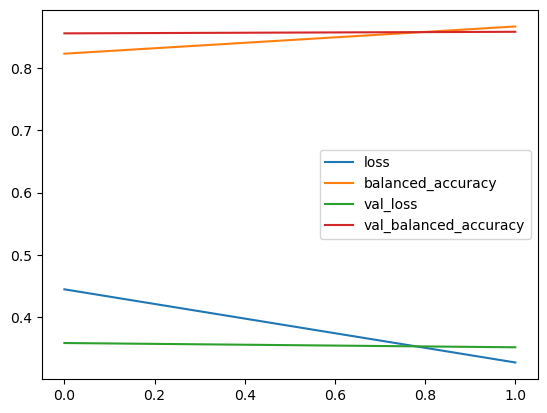

In [170]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [171]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': test['input_ids'], 'attention_mask': test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(y_test, y_predicted))

1118/1118 [==============================] - 10455s 9s/step
              precision    recall  f1-score   support

           1       0.84      0.62      0.72      7165
           2       0.84      0.99      0.91      7255
           3       0.97      1.00      0.98      7073
           4       0.93      1.00      0.97      7074
           5       0.70      0.68      0.69      7188

    accuracy                           0.86     35755
   macro avg       0.86      0.86      0.85     35755
weighted avg       0.85      0.86      0.85     35755



## bert-base-multilingual-cased 2 epochs batch size 32

In [14]:
# Load the tokenizer and pre-trained model
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")
bert = TFBertModel.from_pretrained("bert-base-multilingual-cased" )

Some layers from the model checkpoint at bert-base-multilingual-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-multilingual-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [7]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment'], test_size=0.2, random_state=42)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [8]:
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
X_val = [str(x) for x in X_val]


In [9]:
max_len = 128

train = tokenizer(
    text=X_train,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

test = tokenizer(
    text=X_test,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

val = tokenizer(
    text=X_val,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [10]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':train['input_ids'], 'attention_mask':train['attention_mask']},
    y = to_categorical(y_train),
    validation_data = ({'input_ids':val['input_ids'], 'attention_mask':val['attention_mask']},
                        to_categorical(y_val)),
    epochs=2,
    batch_size=32
)

Epoch 1/2


C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3576/3576 [==============================] - 62701s 18s/step - loss: 0.3872 - balanced_accuracy: 0.8427 - val_loss: 0.2212 - val_balanced_accuracy: 0.9098
Epoch 2/2
3576/3576 [==============================] - 65837s 18s/step - loss: 0.2138 - balanced_accuracy: 0.9131 - val_loss: 0.1914 - val_balanced_accuracy: 0.9233


<Figure size 800x500 with 0 Axes>

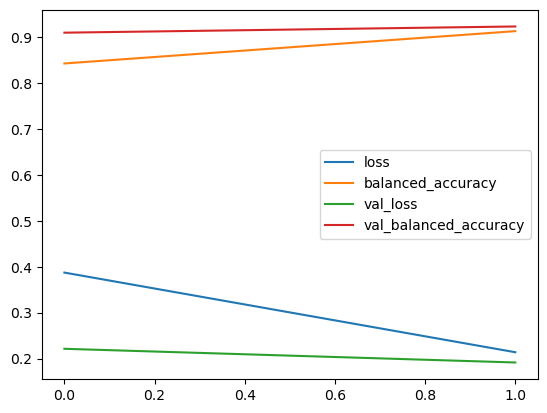

In [11]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [12]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': test['input_ids'], 'attention_mask': test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(y_test, y_predicted))

1118/1118 [==============================] - 5883s 5s/step


NameError: name 'np' is not defined

In [13]:
import numpy as np
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.86      0.82      0.84      7165
           2       0.96      1.00      0.98      7255
           3       0.99      1.00      1.00      7073
           4       0.97      1.00      0.99      7074
           5       0.84      0.81      0.82      7188

    accuracy                           0.93     35755
   macro avg       0.92      0.93      0.93     35755
weighted avg       0.92      0.93      0.92     35755



In [14]:
model.save("bert-multilingual-fine-tuned-mult-russian-ukrainian.h5")

In [3]:
import os

import tensorflow as tf
from tensorflow import keras

In [104]:
import tensorflow as tf
from transformers import TFBertModel

# Define the custom object
custom_objects = {'TFBertModel': TFBertModel}

# Load the saved model
with tf.keras.utils.custom_object_scope(custom_objects):
    model = tf.keras.models.load_model('rubert-tiny-toxicity.h5')



In [105]:
max_len = 128

In [106]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

In [167]:
# Encode the input text
input_text = "я тебе дуже поважаю, як людину, aле ти уебан"

In [168]:


text = tokenizer(
    text=input_text,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [169]:
text

{'input_ids': <tf.Tensor: shape=(1, 21), dtype=int32, numpy=
array([[    2,   343,  2710,  4902,  1560,  3881,  9571, 17238, 28070,
           16,  1416,  9022,  1673,    16,    68,  1736,  9586,   331,
        27967,   679,     3]])>, 'attention_mask': <tf.Tensor: shape=(1, 21), dtype=int32, numpy=array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])>}

In [170]:
input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

In [171]:

encoded_input = tokenizer(input_text, padding=True, truncation=True, return_tensors='tf')

# Get the input Is and attention mask
input_ids = encoded_input['input_ids']
attention_mask = encoded_input['attention_mask']

# Resize the input tensor to match the expected shape of the model
padded_input_ids = tf.pad(input_ids, [[0, 0], [0, 128 - tf.shape(input_ids)[1]]])
padded_attention_mask = tf.pad(attention_mask, [[0, 0], [0, 128 - tf.shape(attention_mask)[1]]])

# Get the model output
output = model([padded_input_ids, padded_attention_mask])

label_mapping = {1: "non-toxic", 2: "insults", 3: "obscenities", 4: "threats", 5: "dangerous"}

# Get the predicted class
predicted_index = tf.argmax(output, axis=1).numpy()[0]
predicted_class = label_mapping[predicted_index]

In [172]:
print(predicted_class)

insults


## cointegrated/rubert-tiny-toxicity

In [102]:
from transformers import TFAutoModel, BertTokenizerFast
from transformers import TFRobertaModel
from transformers import TFBertModel


# Load the tokenizer and pre-trained model
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny-toxicity")
bert = TFBertModel.from_pretrained("cointegrated/rubert-tiny-toxicity", from_pt=True)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['classifier.weight', 'classifier.bias', 'bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [14]:
import pandas as pd

df = pd.read_csv("../../Desktop/notebooks/resample.csv")

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['comment_text'], df['sentiment'], test_size=0.2, random_state=42, shuffle=True)

# Split the train set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, shuffle=True)

In [15]:
X_train = [str(x) for x in X_train]
X_test = [str(x) for x in X_test]
X_val = [str(x) for x in X_val]


In [16]:
max_len = 128

train = tokenizer(
    text=X_train,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

test = tokenizer(
    text=X_test,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

val = tokenizer(
    text=X_val,
    add_special_tokens=True,
    max_length=max_len,
    truncation=True,
    padding=True,
    return_tensors='tf',
    return_token_type_ids=False,
    return_attention_mask=True,
    verbose=True
)

In [17]:
import tensorflow as tf
#from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids, attention_mask = input_mask)[0]

embeddings = bert(input_ids, attention_mask = input_mask)[0] # 0 = last hidden state, 1 = poller_output
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32, activation='relu')(out)
y = Dense(6, activation='softmax')(out)

model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True

optimizer = Adam(
    learning_rate=5e-05, # HF recommendation
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0
)

loss = CategoricalCrossentropy(from_logits=True)
metric = CategoricalAccuracy('balanced_accuracy')

model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=metric
)

history = model.fit(
    x = {'input_ids':train['input_ids'], 'attention_mask':train['attention_mask']},
    y = to_categorical(y_train),
    validation_data = ({'input_ids':val['input_ids'], 'attention_mask':val['attention_mask']},
                        to_categorical(y_val)),
    epochs=2,
    batch_size=32
)

Epoch 1/2


C:\Users\DVdovenko\AppData\Roaming\Python\Python39\site-packages\keras\backend.py:5534: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


3576/3576 [==============================] - 61891s 17s/step - loss: 0.4289 - balanced_accuracy: 0.8555 - val_loss: 0.2791 - val_balanced_accuracy: 0.9010
Epoch 2/2
3576/3576 [==============================] - 52179s 15s/step - loss: 0.2932 - balanced_accuracy: 0.8958 - val_loss: 0.2458 - val_balanced_accuracy: 0.9103


<Figure size 800x500 with 0 Axes>

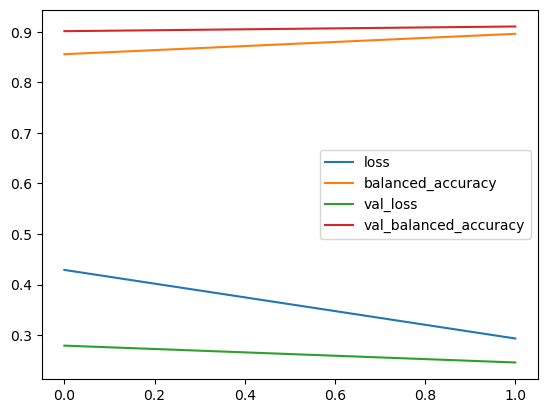

In [18]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [20]:
from sklearn.metrics import classification_report

predicted = model.predict({'input_ids': test['input_ids'], 'attention_mask': test['attention_mask']})
y_predicted = np.argmax(predicted, axis=1)
print(classification_report(y_test, y_predicted))

1118/1118 [==============================] - 4222s 4s/step
              precision    recall  f1-score   support

           1       0.98      0.81      0.89      7165
           2       0.88      0.98      0.93      7255
           3       0.97      1.00      0.98      7073
           4       0.92      1.00      0.96      7074
           5       0.81      0.78      0.79      7188

    accuracy                           0.91     35755
   macro avg       0.91      0.91      0.91     35755
weighted avg       0.91      0.91      0.91     35755



In [21]:
model.save("cointegrated/rubert-tiny-toxicity.h5")